In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Прочитайте csv файл (використовуйте функцію read_csv)
bestbooks = pd.read_csv("bestsellers with categories.csv")

In [27]:
# Виведіть перші п'ять рядків (використовується функція head)
print(bestbooks.head(5))

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [28]:
# Виведіть розміри датасету (використовуйте атрибут shape)
print(bestbooks.shape)

(550, 7)


In [29]:
# Відповідь: Про скільки книг зберігає дані датасет? 550

bestbooks.columns = [
    "name",
    "author",
    "user_rating",
    "reviews",
    "price",
    "year",
    "genre",
]

In [30]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
data = bestbooks
gaps = data.isna().sum()
print(gaps)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [31]:
# Чи є в якихось змінних пропуски? (Так / ні)
print("ні")

ні


In [32]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
# Відповідь: Які є унікальні жанри? 'Non Fiction' 'Fiction'
print(bestbooks["genre"].unique())

['Non Fiction' 'Fiction']


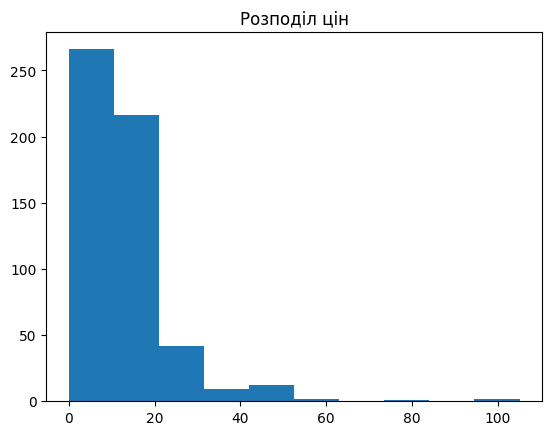

In [33]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
data_price = bestbooks["price"]
plt.hist(data_price)
plt.title("Pозподіл цін")
plt.show()

In [34]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
min_price = data_price.min()
max_price = data_price.max()
mean_price = data_price.mean()
median_price = data_price.median()
print(
    f"Мінімальна ціна: {min_price}, Максимальна ціна: {max_price}, Середня ціна: {mean_price}, Медіанна ціна: {median_price}"
)

Мінімальна ціна: 0, Максимальна ціна: 105, Середня ціна: 13.1, Медіанна ціна: 11.0


In [35]:
# Відповідь: Максимальна ціна? 105
# Відповідь: Мінімальна ціна? 0
# Відповідь: Середня ціна? 13.1
# Відповідь: Медіанна ціна? 11.0

# Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

print(bestbooks["user_rating"].max())
# Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52
print(bestbooks["user_rating"].max().sum())
print(bestbooks[bestbooks["user_rating"] == bestbooks["user_rating"].max()].shape[0])

4.9
4.9
52


In [36]:
# Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
print(bestbooks[bestbooks["reviews"] == bestbooks["reviews"].max()]["name"])

534    Where the Crawdads Sing
Name: name, dtype: object


In [37]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Hamilton: The Revolution
data = bestbooks.sort_values(by="user_rating", ascending=False).head(50)
print(data[data["price"] == data["price"].max()]["name"])

151    Hamilton: The Revolution
Name: name, dtype: object


In [38]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 7
data = bestbooks.sort_values(by="user_rating", ascending=False).head(50)
print(data[(data["year"] == 2010) & (data["genre"] == "Fiction")].shape[1])

7


In [39]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
print(
    bestbooks[
        (bestbooks["year"] == 2010 | 2011)
        & (data["user_rating"] == bestbooks["user_rating"].max())
    ].shape[0]
)

1


In [40]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
data = bestbooks[(bestbooks["year"] == 2015) & (bestbooks["price"] < 8)]
data = data.sort_values(by="price", ascending=True)
print(data)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [41]:
# Відповідь: Яка книга остання у відсортованому списку? Відповідь:
print(data.iloc[-1, :]["name"])

Old School (Diary of a Wimpy Kid #10)


In [42]:
# Агрегування даних та з'єднання таблиць
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних
# та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
data = (
    bestbooks.groupby(["genre"], group_keys=False)
    .agg({"price": ["max", "min"]})
    .reset_index()
)
print(data)

         genre price    
                 max min
0      Fiction    82   0
1  Non Fiction   105   0


In [43]:
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82

# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0

# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105

# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0

# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для
# підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
data = (
    bestbooks.groupby(["author"], group_keys=False)
    .agg({"author": ["count"]})
    .reset_index()
)
print(data)

                         author      
                                count
0              Abraham Verghese     2
1                Adam Gasiewski     1
2                 Adam Mansbach     1
3                     Adir Levy     1
4    Admiral William H. McRaven     1
..                          ...   ...
243             Walter Isaacson     3
244               William Davis     2
245            William P. Young     2
246            Wizards RPG Team     3
247                Zhi Gang Sha     2

[248 rows x 2 columns]


In [44]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: [248 rows x 2 columns]

# Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
amount = data["author"]["count"].max()
print(data[(data["author"]["count"] == amount)])
# Відповідь: Скільки книг цього автора? Відповідь: 12

          author      
                 count
120  Jeff Kinney    12


In [45]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg,
# для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
data2 = (
    bestbooks.groupby(["author"], group_keys=False)
    .agg({"user_rating": ["mean"]})
    .reset_index()
)
print(data2["user_rating"].round(1))

     mean
0     4.6
1     4.4
2     4.8
3     4.8
4     4.7
..    ...
243   4.6
244   4.4
245   4.6
246   4.8
247   4.6

[248 rows x 1 columns]


In [46]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
author_rate = data2["user_rating"]["mean"].min()
print(data2[data2["user_rating"]["mean"] == author_rate])
# Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

         author user_rating
                       mean
71  Donna Tartt         3.9


In [47]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
data_concat = pd.concat([data, data2], axis=1)
data_concat = data_concat.T.drop_duplicates().T
print(data_concat)

                         author       user_rating
                                count        mean
0              Abraham Verghese     2         4.6
1                Adam Gasiewski     1         4.4
2                 Adam Mansbach     1         4.8
3                     Adir Levy     1         4.8
4    Admiral William H. McRaven     1         4.7
..                          ...   ...         ...
243             Walter Isaacson     3    4.566667
244               William Davis     2         4.4
245            William P. Young     2         4.6
246            Wizards RPG Team     3         4.8
247                Zhi Gang Sha     2         4.6

[248 rows x 3 columns]


In [48]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

data_concat = data_concat.sort_values(
    [("author", "count"), ("user_rating", "mean")],
    ascending=True,
    ignore_index=True,
)
print(data_concat)
print(data_concat.iloc[0])

# Відповідь: Який автор перший у списку? Muriel Barbery

                                 author       user_rating
                                        count        mean
0                        Muriel Barbery     1         4.0
1                          Chris Cleave     1         4.1
2                     Ian K. Smith M.D.     1         4.1
3                          Pierre Dukan     1         4.1
4                      Elizabeth Strout     1         4.2
..                                  ...   ...         ...
243  American Psychological Association    10         4.5
244                     Suzanne Collins    11    4.663636
245                        Gary Chapman    11    4.736364
246                        Rick Riordan    11    4.772727
247                         Jeff Kinney    12         4.8

[248 rows x 3 columns]
author                Muriel Barbery
             count                 1
user_rating  mean                4.0
Name: 0, dtype: object


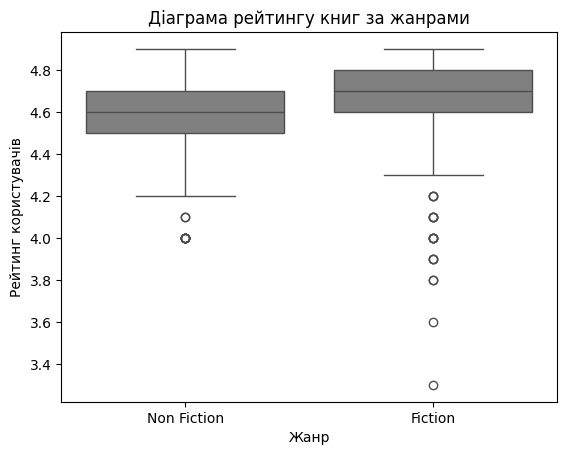

In [51]:
# Діаграма-boxplot рейтингу книг за жанрами
sns.boxplot(x="genre", y="user_rating", data=bestbooks, color="grey")
plt.title("Діаграма рейтингу книг за жанрами")
plt.xlabel("Жанр")
plt.ylabel("Рейтинг користувачів")
plt.show()

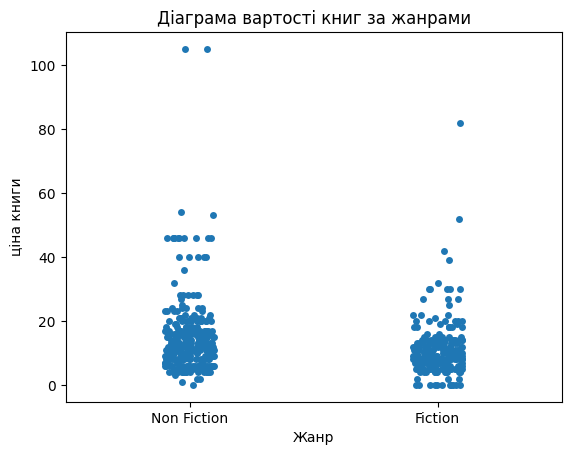

In [49]:
# Точкова діаграма вартості книг за жанрами
sns.stripplot(x="genre", y="price", data=bestbooks)
plt.title("Діаграма вартості книг за жанрами")
plt.xlabel("Жанр")
plt.ylabel("ціна книги")
plt.show()